## IMPORTING LIBRARIES 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
train=pd.read_csv('D:/INTERN ACADEMY TASKS/train.csv',header=0)

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
train.columns

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)

## VISUALIZING THE DATA

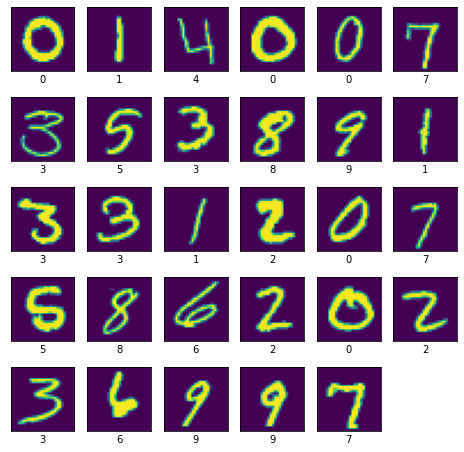

In [5]:
plt.figure(figsize=(8,8))

for i in range(1,30):
    plt.subplot(5,6,i)
    plt.xticks([])
    plt.yticks([])
    img=train.iloc[i,1:]
    img=np.array(img)
    img=img.reshape((28,28))
    plt.imshow(img)
    plt.xlabel(train.iloc[i,0])


In [6]:
x=train.drop('label',axis=1)

In [7]:
y=train['label']

## SPLITTING THE DATASET INTO TRAINING AND VALIDATION DATA

In [9]:
from sklearn.model_selection import train_test_split

x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=0.3,random_state=42)

x_train.shape,x_val.shape,y_train.shape,y_val.shape

((29400, 784), (12600, 784), (29400,), (12600,))

## IMPORT XGBCLASSIFIER FROM XGBOOST LIBRARY

In [11]:
from xgboost import XGBClassifier

In [12]:
xgb=XGBClassifier()

In [13]:
import warnings
warnings.filterwarnings('ignore')

xgb.fit(x_train,y_train)

[19:53:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

## PREDICTIONS OF MODEL USING VALIDATION DATA

In [15]:
y_val_pred=xgb.predict(x_val)

In [16]:
y_val_pred

array([8, 1, 9, ..., 5, 5, 0], dtype=int64)

In [39]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_val_pred,y_val)*100)

97.18253968253968


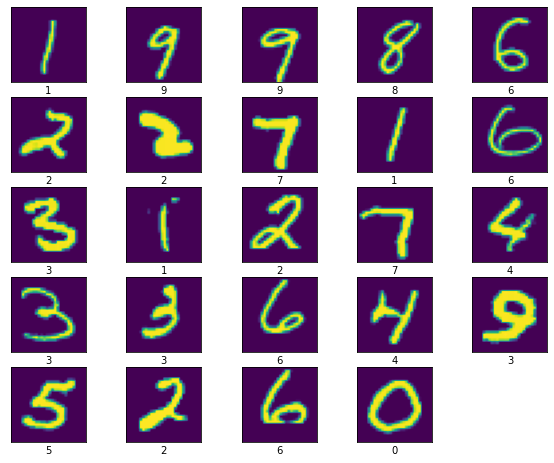

In [20]:
plt.figure(figsize=(10,8))
for i in range(1,len(x_val.index.values)//500):
    plt.subplot(5,5,i)
    img=train[train.index==x_val.index.values[i]].iloc[0,1:].values
    img=img.reshape((28,28))
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img)
    plt.xlabel(y_val_pred[i])
    
    
    
    

## IMPORTING TEST DATASET

In [25]:
test=pd.read_csv('D:/INTERN ACADEMY TASKS/test.csv',header=0)

In [27]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
test.shape

(28000, 784)

## PREDICTIONS ON TEST DATASET

In [28]:
y_pred=xgb.predict(test)

In [29]:
y_pred


array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

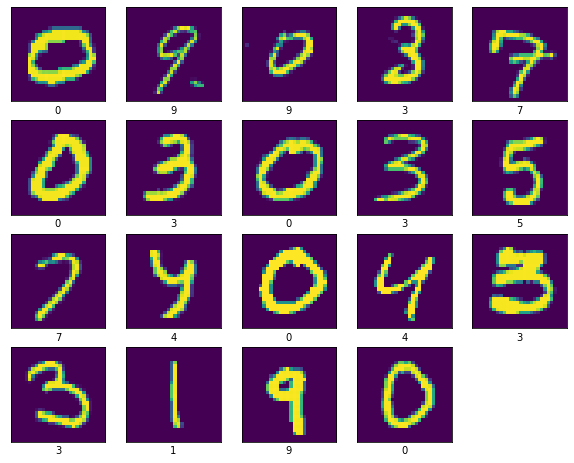

In [37]:
plt.figure(figsize=(10,8))
for i in range(1,len(test.index.values)//1400):
    plt.subplot(4,5,i)
    img=test.iloc[i,:].values
    img=img.reshape((28,28))
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img)
    plt.xlabel(y_pred[i])
    